In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [72]:
df = pd.read_csv("./formatted_results.csv")
gma_enabled_on_dataset = df.loc[0]["GraphMatchingAttack"]
overlap_or_training_proportion = "Overlap" if gma_enabled_on_dataset else "Overlap"


In [73]:
df["Overlap"] = df["Overlap"].astype(float)
df["TrainedF1"] = df["TrainedF1"].astype(float)
df["ReidentificationRate"] = df["ReidentificationRate"].astype(float)
baseline_metrics = {
    "fakename_1k":     {"Precision": 0.2162, "Recall": 0.2476, "Dice Coefficient": 0.2300},
    "fakename_2k":     {"Precision": 0.2131, "Recall": 0.2452, "Dice Coefficient": 0.2271},
    "fakename_5k":     {"Precision": 0.2144, "Recall": 0.2470, "Dice Coefficient": 0.2287},
    "fakename_10k":    {"Precision": 0.2151, "Recall": 0.2467, "Dice Coefficient": 0.2289},
    "fakename_20k":    {"Precision": 0.2153, "Recall": 0.2473, "Dice Coefficient": 0.2293},
    "fakename_50k":    {"Precision": 0.2151, "Recall": 0.2463, "Dice Coefficient": 0.2288},
    "titanic_full":    {"Precision": 0.2468, "Recall": 0.3770, "Dice Coefficient": 0.2896},
    "euro_person":     {"Precision": 0.2197, "Recall": 0.2446, "Dice Coefficient": 0.2306}
}

encoding_map = {
    "BloomFilter": "Bloom Filter",
    "TabMinHash": "Tabulation Minhash",
    "TwoStepHash": "Two-Step Hash"
}
dataset_map = {
    "fakename_1k.tsv": "FakeName (1k)",
    "fakename_2k.tsv": "FakeName (2k)",
    "fakename_5k.tsv": "FakeName (5k)",
    "fakename_10k.tsv": "FakeName (10k)",
    "fakename_20k.tsv": "FakeName (20k)",
    "fakename_50k.tsv": "FakeName (50k)",
    "titanic_full.tsv": "Titanic",
    "euro_person.tsv": "EuroPerson"
}

dataset_order = [
    "fakename_1k.tsv",
    "fakename_2k.tsv",
    "fakename_5k.tsv",
    "fakename_10k.tsv",
    "fakename_20k.tsv",
    "fakename_50k.tsv",
    "titanic_full.tsv",
    "euro_person.tsv"
]
dataset_order_index = {name: idx for idx, name in enumerate(dataset_order)}

def sort_datasets(sequence):
    """Return datasets in the canonical plotting order."""
    return sorted(sequence, key=lambda name: dataset_order_index.get(name, len(dataset_order_index)))



In [74]:
groupedByEncoding = (
    df.groupby(["Encoding", "Overlap"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)
groupedByDataset = (
  df.groupby(["Dataset", "Overlap"])
    [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
    .mean()
    .reset_index()
)
groupedByEncodingAndDataset = (
    df.groupby(["Encoding", "Overlap", "Dataset"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)

In [75]:
overall_avg_f1 = df["TrainedF1"].mean()
overall_avg_prr = df["ReidentificationRate"].mean()
print(f"Average F1:  {overall_avg_f1:.4f}")
print(f"Average PRR: {overall_avg_prr:.4f}")

best_f1_idx = df["TrainedF1"].idxmax()
best_reid_idx = df["ReidentificationRate"].idxmax()
best_f1_exp = df.loc[best_f1_idx]
best_reid_exp = df.loc[best_reid_idx]

print(f"Best F1: {best_f1_exp['TrainedF1']:.4f}")
print(f"Best PRR: {best_reid_exp['ReidentificationRate']:.4f}")

# === AVERAGES ===
avg_per_encoding = (
    df.groupby("Encoding")[["TrainedF1", "ReidentificationRate"]]
      .mean()
      .rename(columns={"TrainedF1": "AvgF1", "ReidentificationRate": "AvgPRR"})
      .reset_index()
)



print("\nAverage Per Encoding")
print(avg_per_encoding)



# === BEST PER ENCODING ===
best_per_encoding = (
    df.loc[df.groupby("Encoding")["TrainedF1"].idxmax(), 
           ["Encoding", "Dataset", "TrainedF1", "ReidentificationRate"]]
    .rename(columns={"TrainedF1": "F1", "ReidentificationRate": "PRRAtBestF1"})
    .reset_index(drop=True)
)
print("\nBest Per Encoding (by F1 Score)")
print(best_per_encoding)

best_per_encoding_reid = (
    df.loc[df.groupby("Encoding")["ReidentificationRate"].idxmax(),
           ["Encoding", "Dataset", "TrainedF1", "ReidentificationRate"]]
    .rename(columns={"ReidentificationRate": "PRR", "TrainedF1": "F1AtBestPRR"})
    .reset_index(drop=True)
)
print("\nBest Per Encoding (by PRR)")
print(best_per_encoding_reid)



Average F1:  0.7693
Average PRR: 0.0318
Best F1: 0.9873
Best PRR: 0.2087

Average Per Encoding
      Encoding     AvgF1    AvgPRR
0  BloomFilter  0.800430  0.025825
1   TabMinHash  0.730934  0.018183
2  TwoStepHash  0.776086  0.049973

Best Per Encoding (by F1 Score)
      Encoding           Dataset        F1  PRRAtBestF1
0  BloomFilter  fakename_20k.tsv  0.966783       0.1303
1   TabMinHash  fakename_20k.tsv  0.960701       0.0955
2  TwoStepHash   euro_person.tsv  0.987326       0.2087

Best Per Encoding (by PRR)
      Encoding           Dataset  F1AtBestPRR     PRR
0  BloomFilter  fakename_20k.tsv     0.966783  0.1303
1   TabMinHash  fakename_20k.tsv     0.960701  0.0955
2  TwoStepHash   euro_person.tsv     0.987326  0.2087



Encoding: Bloom Filter
(0.2, 0.704512273684163)
(0.4, 0.8189332668440308)
(0.6, 0.7992379663138807)
(0.8, 0.8790375164094254)

Encoding: Tabulation Minhash
(0.2, 0.5929929111762618)
(0.4, 0.6819325137041604)
(0.6, 0.8205537520846994)
(0.8, 0.8282568425517448)

Encoding: Two-Step Hash
(0.2, 0.7300921417097292)
(0.4, 0.7687199926112865)
(0.6, 0.7226996126934232)
(0.8, 0.8917233992263486)


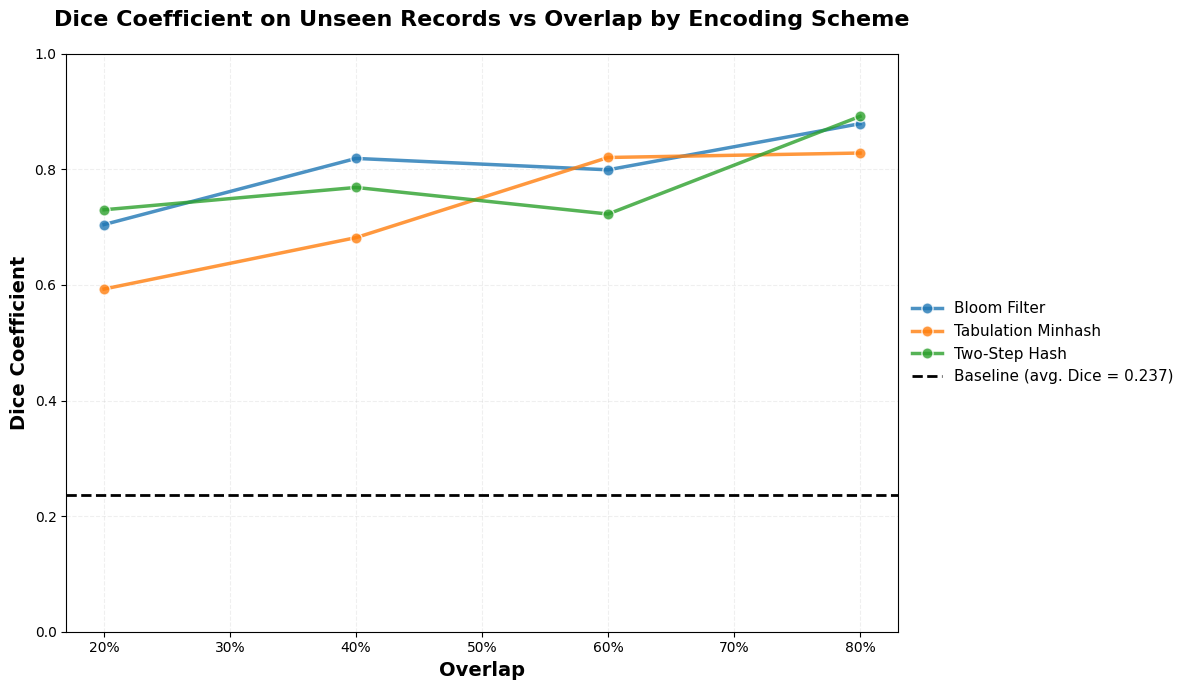

In [76]:
plt.figure(figsize=(12, 7))

encodings = groupedByEncoding['Encoding'].unique()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

encodings.sort()

for i, encoding in enumerate(encodings):
    encoding_data = groupedByEncoding[groupedByEncoding['Encoding'] == encoding]
    
    # Print (x, y) pairs
    print(f"\nEncoding: {encoding_map.get(encoding, encoding)}")
    for x, y in zip(encoding_data['Overlap'], encoding_data['TrainedF1']):
        print(f"({x}, {y})")
    
    # Plot the line
    plt.plot(encoding_data['Overlap'], encoding_data['TrainedF1'], 
             marker='o', 
             color=colors[i], 
             linewidth=2.5, 
             markersize=8,
             markeredgecolor="white",
             label=encoding_map.get(encoding, encoding),
             alpha=0.8)

# Add baseline Dice Coefficient (averaged across all datasets) as a horizontal line
baseline_f1s = [v['Dice Coefficient'] for v in baseline_metrics.values()]
avg_baseline_f1 = sum(baseline_f1s) / len(baseline_f1s)
plt.axhline(y=avg_baseline_f1, color='black', linestyle='--', linewidth=2, label=f'Baseline (avg. Dice = {avg_baseline_f1:.3f})')

# Customize the plot
plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylabel('Dice Coefficient', fontsize=14, fontweight='bold')
plt.title(f"Dice Coefficient on Unseen Records vs {overlap_or_training_proportion} by Encoding Scheme", fontsize=16, fontweight='bold', pad=20)
# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.ylim(0, 1)

# Improve layout
plt.tight_layout()
plt.show()


Encoding: Bloom Filter
(0.2, 0.010199999999999983)
(0.4, 0.03621666666666667)
(0.6, 0.03335)
(0.8, 0.023533333333333333)

Encoding: Tabulation Minhash
(0.2, 0.0042833333333333334)
(0.4, 0.014566666666666667)
(0.6, 0.022883333333333335)
(0.8, 0.031)

Encoding: Two-Step Hash
(0.2, 0.02725714285714284)
(0.4, 0.06551428571428572)
(0.6, 0.038783333333333336)
(0.8, 0.06953333333333334)


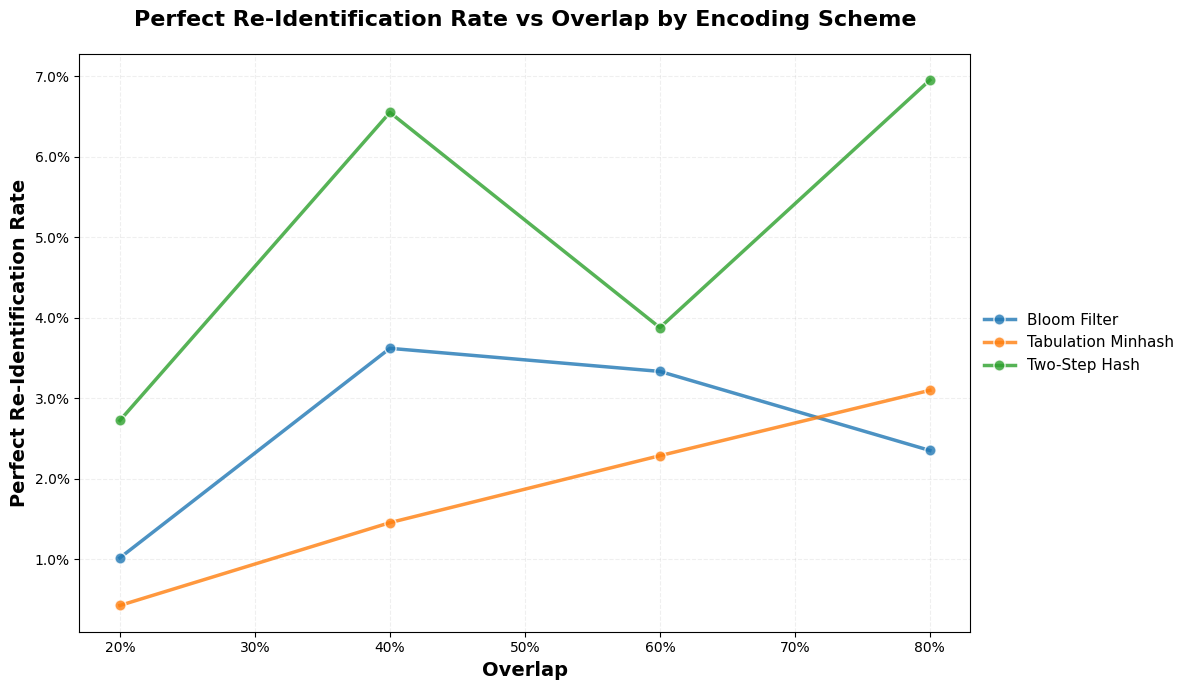

In [77]:
plt.figure(figsize=(12, 7))

# Get unique encoding schemes
encodings = groupedByEncoding['Encoding'].unique()

# Create a color palette for the different encoding schemes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

for i, encoding in enumerate(encodings):
    # Filter data for this encoding
    encoding_data = groupedByEncoding[groupedByEncoding['Encoding'] == encoding]
    
    # Print (x, y) pairs
    print(f"\nEncoding: {encoding_map.get(encoding, encoding)}")
    for x, y in zip(encoding_data['Overlap'], encoding_data['ReidentificationRate']):
        print(f"({x}, {y})")
    
    # Plot the line
    plt.plot(encoding_data['Overlap'], encoding_data['ReidentificationRate'] * 100, 
             marker='o', 
             color=colors[i], 
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             markersize=8,
             label=encoding_map.get(encoding, encoding),
             alpha=0.8)

# Customize the plot
plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())
ax.xaxis.set_major_formatter(PercentFormatter(1.0))

plt.title(f"Perfect Re-Identification Rate vs {overlap_or_training_proportion} by Encoding Scheme", fontsize=16, fontweight='bold', pad=20)
# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

# Improve layout
plt.tight_layout()
plt.show()


Dataset: fakename_1k.tsv
(0.2, 0.4533723255423339)
(0.4, 0.3165613575650012)
(0.6, 0.6224756717318113)
(0.8, 0.7148037561730031)

Dataset: fakename_2k.tsv
(0.2, 0.5284018375094658)
(0.4, 0.7520235423561271)
(0.6, 0.6522349865534864)
(0.8, 0.8095163660425108)

Dataset: fakename_5k.tsv
(0.2, 0.7765627268406033)
(0.4, 0.8810357381947392)
(0.6, 0.8923153904568922)
(0.8, 0.9330484594106142)

Dataset: fakename_10k.tsv
(0.2, 0.7796754765344361)
(0.4, 0.9307981090500425)
(0.6, 0.9542714083104203)
(0.8, 0.9560868401990561)

Dataset: fakename_20k.tsv
(0.2, 0.9339257342691463)
(0.4, 0.9624297794674349)
(0.6, 0.9403135956253346)
(0.8, 0.9486147748246104)

Dataset: titanic_full.tsv
(0.2, 0.5035313224981419)
(0.4, 0.6234544861274288)
(0.6, 0.6233716095060617)
(0.8, 0.835965319725243)

Dataset: euro_person.tsv
(0.2, 0.9692678315482728)
(0.4, 0.9873255932858316)


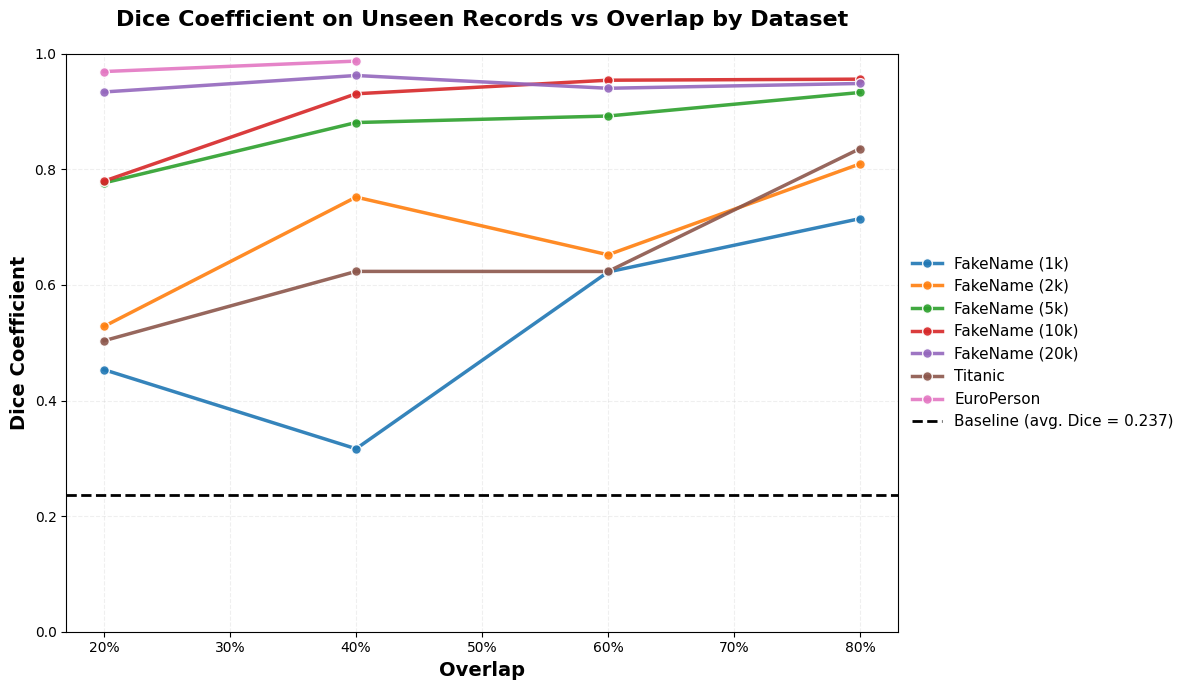

In [78]:
plt.figure(figsize=(12, 7))

datasets = groupedByDataset['Dataset'].unique()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
]

datasets = sort_datasets(datasets)

for i, dataset in enumerate(datasets):
    dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
    
     # Print (x, y) pairs
    print(f"\nDataset: {dataset}")
    for x, y in zip(dataset_data['Overlap'], dataset_data['TrainedF1']):
        print(f"({x}, {y})")
    plt.plot(dataset_data['Overlap'], dataset_data['TrainedF1'], 
             marker='o', 
             markersize=7,
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             color=colors[i % len(colors)],
             label=dataset_map.get(dataset, dataset),
             alpha=0.9)

# Labels & title
plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
plt.ylabel('Dice Coefficient', fontsize=14, fontweight='bold')

plt.title(f"Dice Coefficient on Unseen Records vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

baseline_f1s = [v['Dice Coefficient'] for v in baseline_metrics.values()]
avg_baseline_f1 = sum(baseline_f1s) / len(baseline_f1s)
plt.axhline(y=avg_baseline_f1, color='black', linestyle='--', linewidth=2, label=f'Baseline (avg. Dice = {avg_baseline_f1:.3f})')

# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.ylim(0,1)

plt.tight_layout()
plt.show()

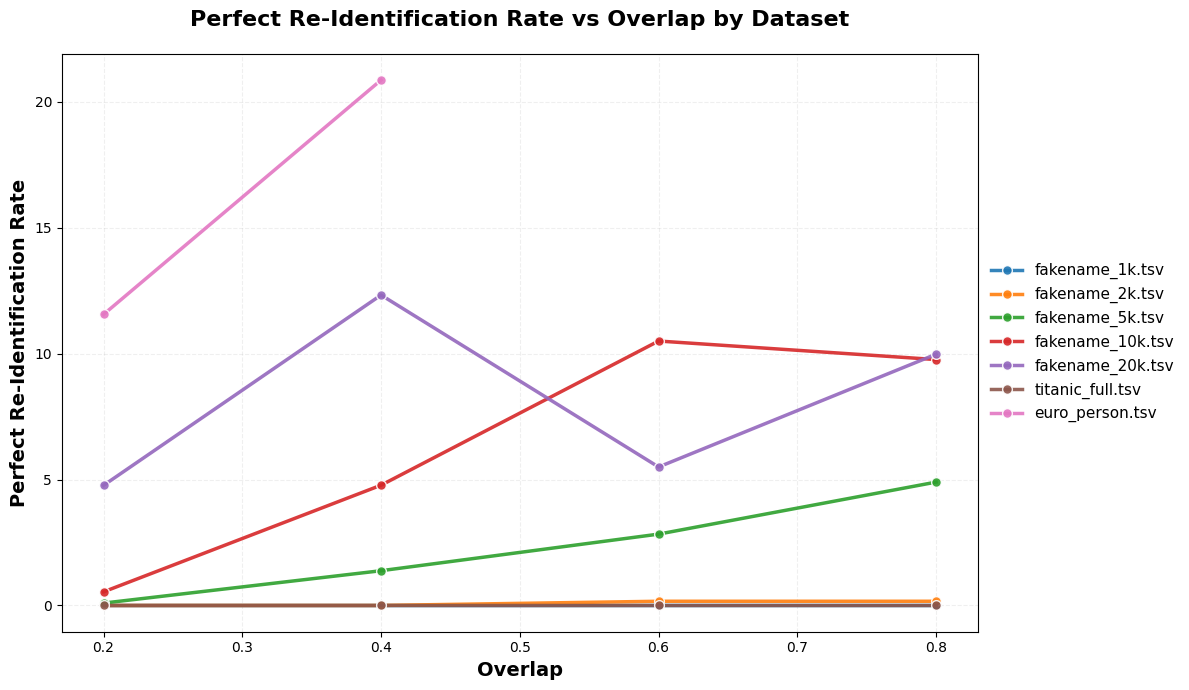

In [79]:
plt.figure(figsize=(12, 7))

datasets = groupedByDataset['Dataset'].unique()

datasets = sort_datasets(datasets)

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
]

for i, dataset in enumerate(datasets):
    dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
    
    plt.plot(dataset_data['Overlap'], dataset_data['ReidentificationRate'] * 100, 
             marker='o', 
             markersize=7,
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             color=colors[i % len(colors)],
             label=dataset,
             alpha=0.9)

# Labels & title
plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')

plt.title(f"Perfect Re-Identification Rate vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.tight_layout()
plt.show()

Encoding: BloomFilter


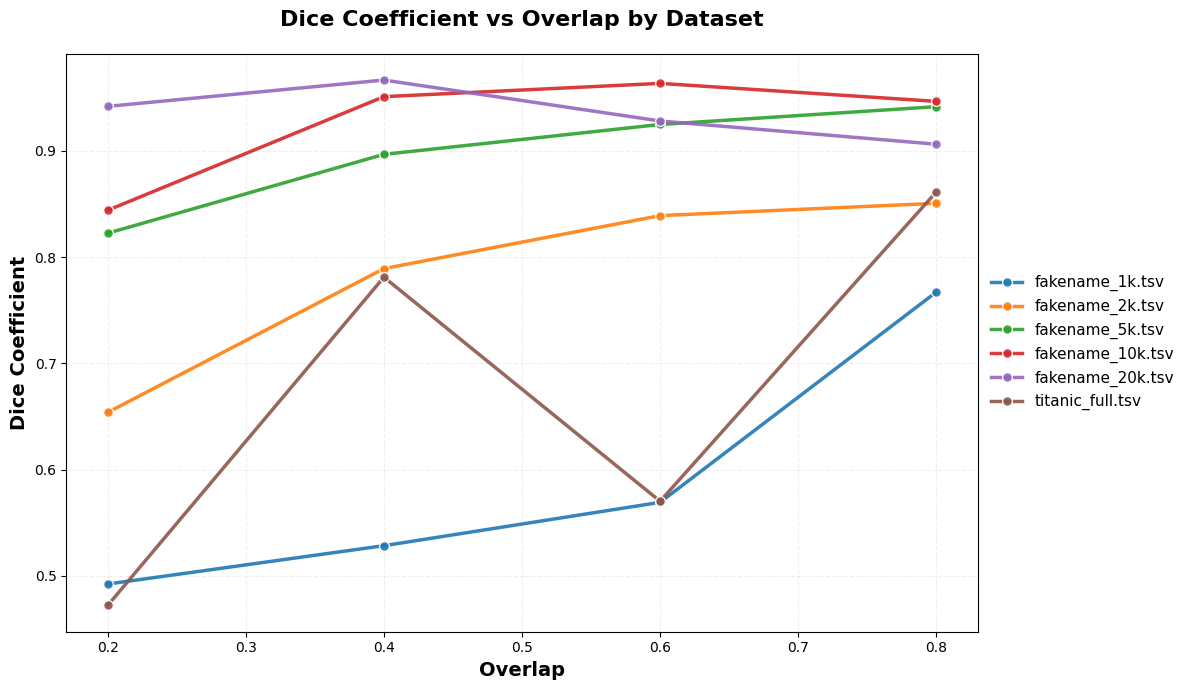

Encoding: TabMinHash


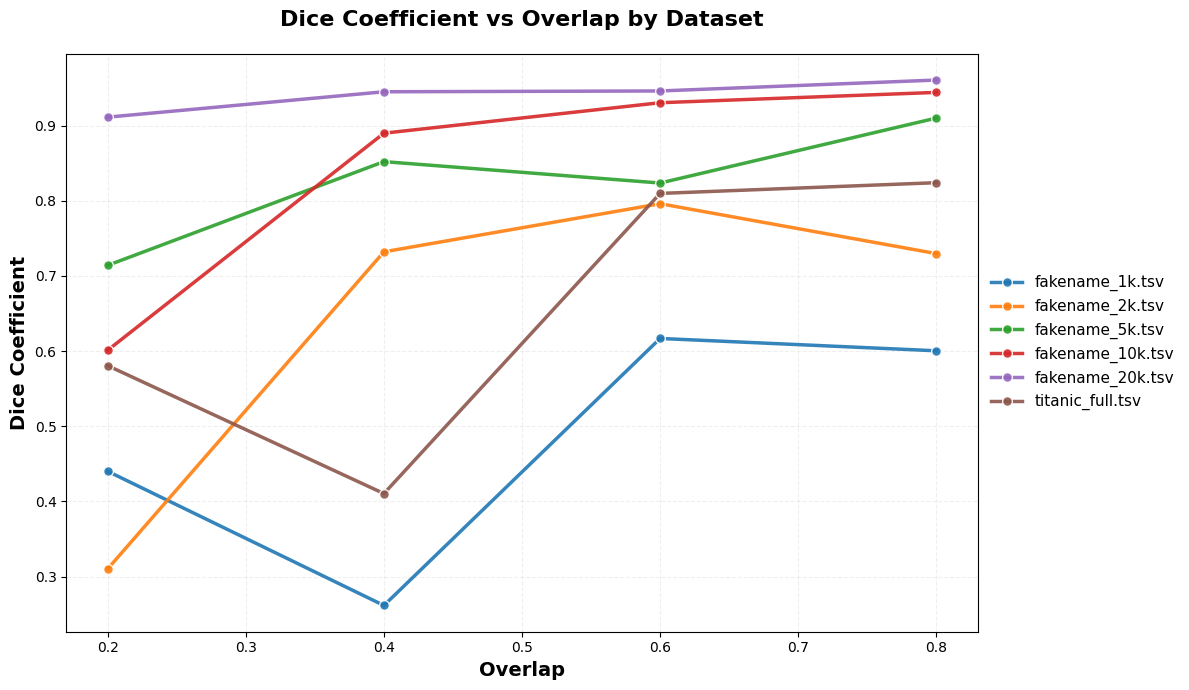

Encoding: TwoStepHash


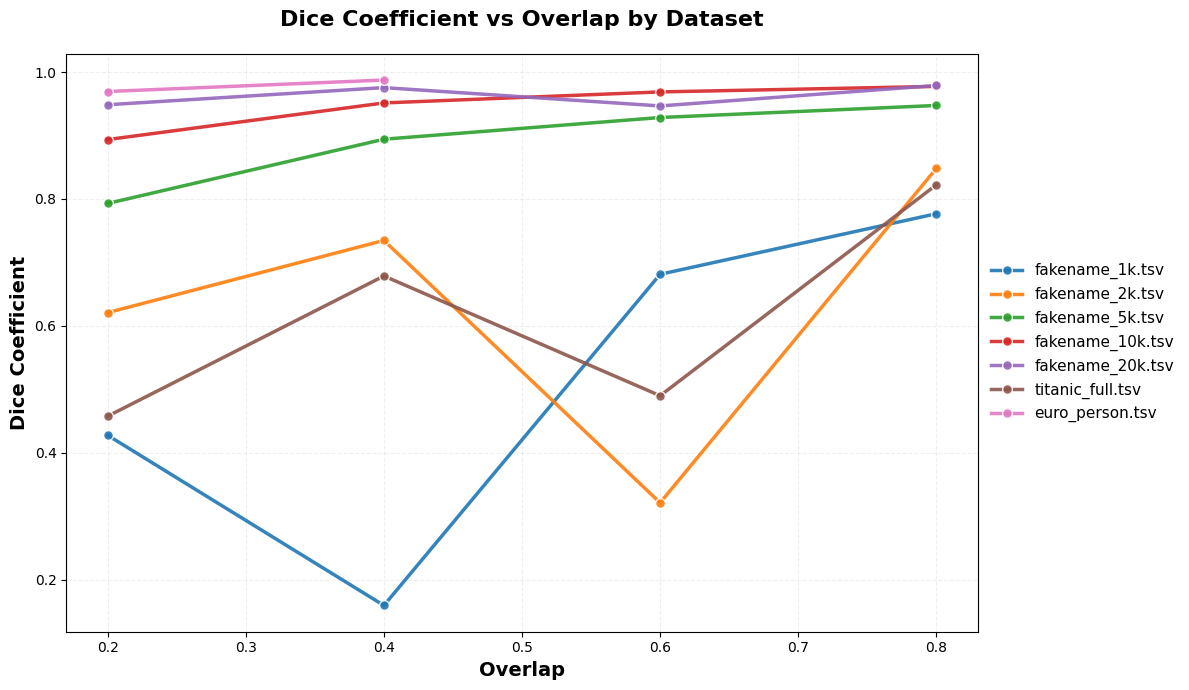

In [80]:
# Get unique encoding schemes
encodings = groupedByEncodingAndDataset['Encoding'].unique()

encodings.sort()

for i, encoding in enumerate(encodings):
    plt.figure(figsize=(12, 7))
    print("Encoding: " + encoding)
    encoding_data = groupedByEncodingAndDataset[groupedByEncodingAndDataset['Encoding'] == encoding]
    datasets = encoding_data['Dataset'].unique()
    
    datasets = sort_datasets(datasets)

    colors = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]

    for i, dataset in enumerate(datasets):
        dataset_data = encoding_data[encoding_data['Dataset'] == dataset]
        
        plt.plot(dataset_data['Overlap'], dataset_data['TrainedF1'], 
                marker='o', 
                markersize=7,
                markeredgecolor="white",   # makes markers clearer
                linewidth=2.5, 
                color=colors[i % len(colors)],
                label=dataset,
                alpha=0.9)

    # Labels & title
    plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
    plt.ylabel('Dice Coefficient', fontsize=14, fontweight='bold')

    plt.title(f"Dice Coefficient vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

    # Legend outside the plot
    plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    # Grid improvements
    plt.grid(True, alpha=0.2, linestyle="--")

    plt.tight_layout()
    plt.show()

Encoding: BloomFilter


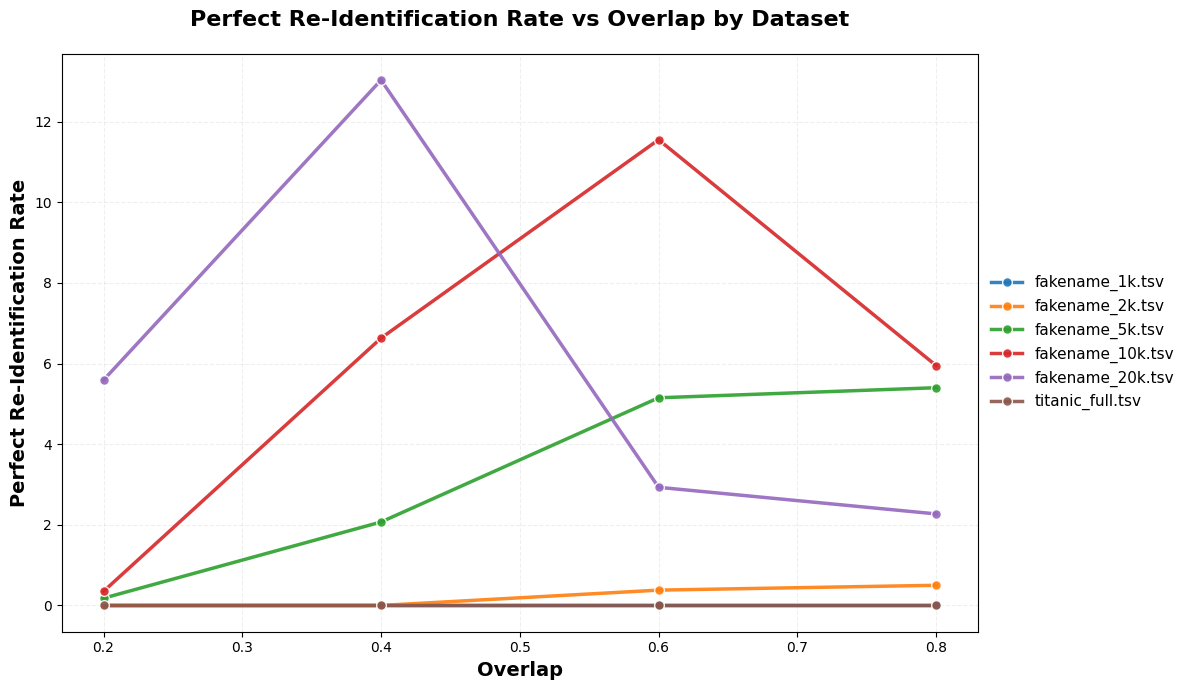

Encoding: TabMinHash


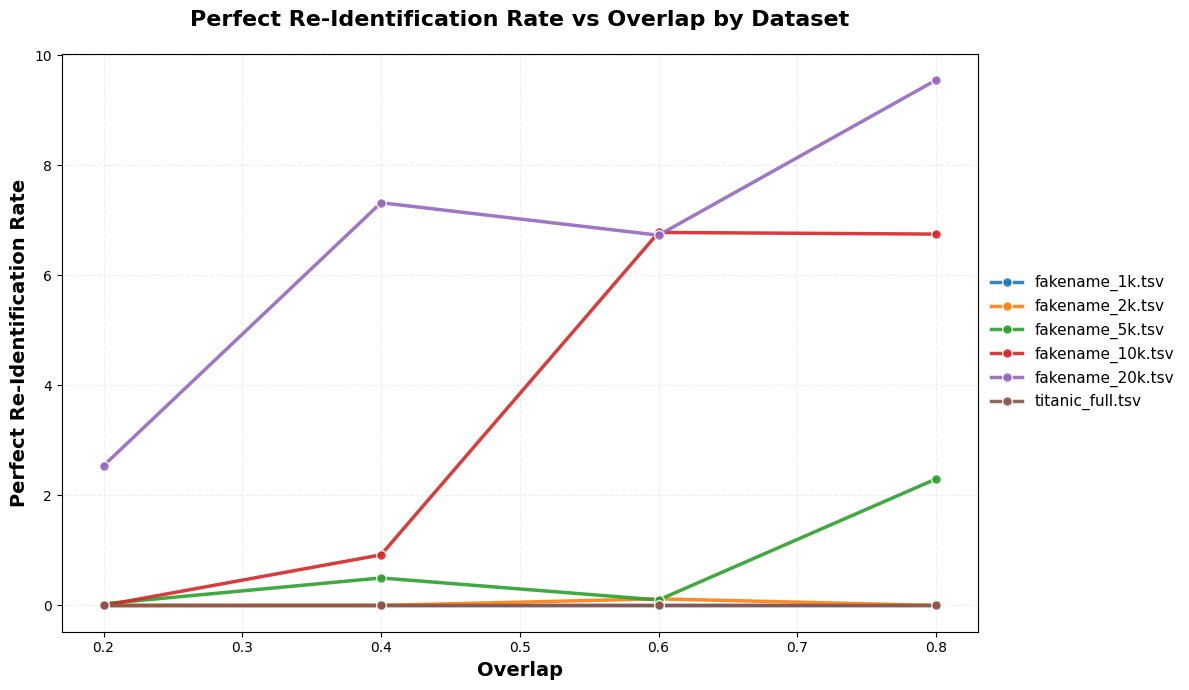

Encoding: TwoStepHash


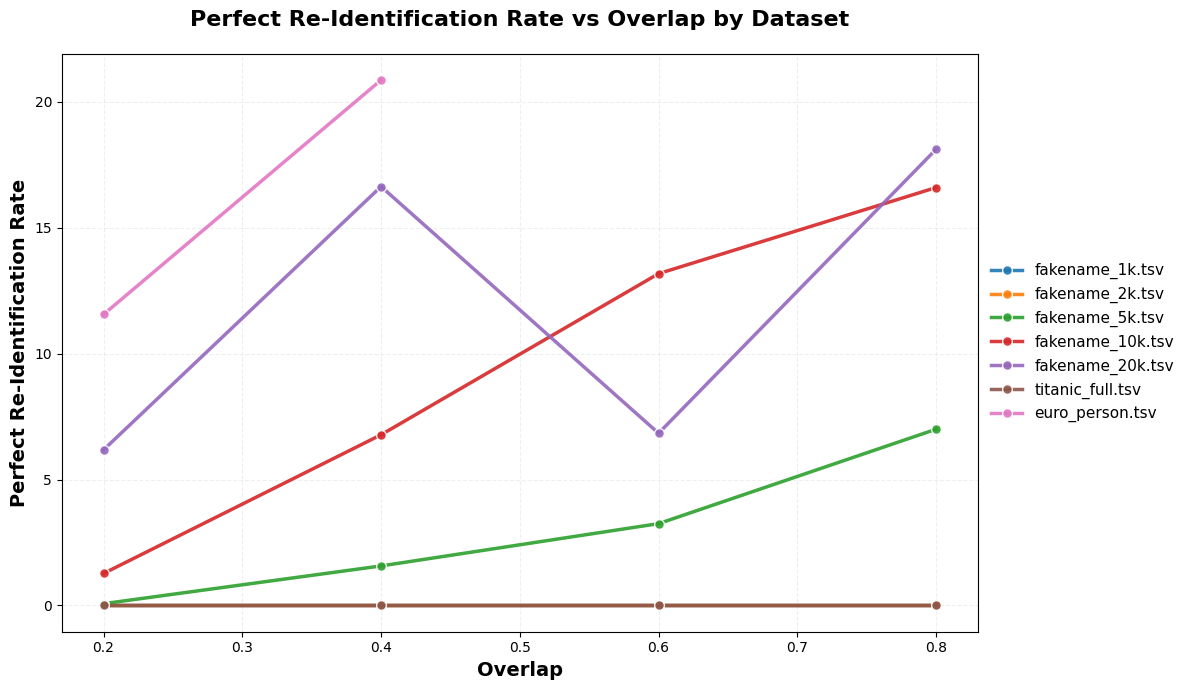

In [81]:
# Get unique encoding schemes
encodings = groupedByEncodingAndDataset['Encoding'].unique()

encodings.sort()

for i, encoding in enumerate(encodings):
    plt.figure(figsize=(12, 7))
    print("Encoding: " + encoding)
    encoding_data = groupedByEncodingAndDataset[groupedByEncodingAndDataset['Encoding'] == encoding]
    datasets = encoding_data['Dataset'].unique()
    
    datasets = sort_datasets(datasets)

    colors = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]

    for i, dataset in enumerate(datasets):
        dataset_data = encoding_data[encoding_data['Dataset'] == dataset]
        
        plt.plot(dataset_data['Overlap'], dataset_data['ReidentificationRate'] * 100, 
                marker='o', 
                markersize=7,
                markeredgecolor="white",   # makes markers clearer
                linewidth=2.5, 
                color=colors[i % len(colors)],
                label=dataset,
                alpha=0.9)

    # Labels & title
    plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
    plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')
    plt.title(f"Perfect Re-Identification Rate vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

    # Legend outside the plot
    plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    # Grid improvements
    plt.grid(True, alpha=0.2, linestyle="--")

    plt.tight_layout()
    plt.show()